# WIP: Scivision demo notebook:

## How scivision can be used for image segmentation 

In [1]:
from scivision import default_catalog, load_pretrained_model, load_dataset

In [2]:
# Get the model repo url
models_catalog = default_catalog.models.to_dataframe()
model_repo = models_catalog[models_catalog.name == "huggingface-segmentation"].url.item()
model_repo # Why not paste the repo link into your browser and see how it looks?

AnyUrl('https://github.com/alan-turing-institute/scivision_huggingface_segmentation', scheme='https', host='github.com', tld='com', host_type='domain', path='/alan-turing-institute/scivision_huggingface_segmentation')

In [3]:
facebook_model = load_pretrained_model(model_repo, model='facebook_detr_resnet_50_panoptic')
nvidia_model = load_pretrained_model(model_repo, model='nvidia_segformer_b5_finetuned_ade_640_640')
microsoft_model = load_pretrained_model(model_repo, model='microsoft_beit_large_finetuned_ade_640_640')

/opt/anaconda3/envs/scivision/lib/python3.9/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [4]:
compatible_datasources = default_catalog.compatible_datasources("huggingface-segmentation").to_dataframe()
compatible_datasources

,name,description,tasks,domains,url,format,labels_provided,institution,tags
0,data-000,None,"(TaskEnum.object_detection, TaskEnum.segmentat...","(optical-microscopy,)",https://github.com/stardist/stardist/releases/...,image,True,"(epfl,)","(help-needed, 3D, cell, cell-counting, biology..."
1,data-001,None,"(TaskEnum.segmentation, TaskEnum.thresholding,...","(multispectral, hyperspectral)",https://gitlab.au.dk/AUENG-Vision/OPPD/-/archi...,image,True,"(Aarhus University,)","(help-needed, 2D, plant-phenotyping, agricultu..."
5,data-005,Sample dataset of satellite imagery required t...,"(TaskEnum.classificiation, TaskEnum.segmentation)","(computer-vision, earth-observation, ecology)",https://github.com/MartinSJRogers/VEdge_Detect...,image,False,"(Cambridge University,)","(2D, satellite, remote-sensing, ecology, envir..."


In [5]:
target_datasource = compatible_datasources.loc[compatible_datasources['name'] == 'data-005']
target_datasource

,name,description,tasks,domains,url,format,labels_provided,institution,tags
5,data-005,Sample dataset of satellite imagery required t...,"(TaskEnum.classificiation, TaskEnum.segmentation)","(computer-vision, earth-observation, ecology)",https://github.com/MartinSJRogers/VEdge_Detect...,image,False,"(Cambridge University,)","(2D, satellite, remote-sensing, ecology, envir..."


In [6]:
target_datasource.url.item()

AnyUrl('https://github.com/MartinSJRogers/VEdge_Detector_scivision', scheme='https', host='github.com', tld='com', host_type='domain', path='/MartinSJRogers/VEdge_Detector_scivision')

In [7]:
cat = load_dataset(target_datasource.url.item()) 
print(list(cat))

['sample_image']


In [8]:
sample_image = cat.sample_image(sample_image='winterton').to_dask()

/opt/anaconda3/envs/scivision/lib/python3.9/site-packages/xarray/core/dataset.py:2172: FutureWarning: None value for 'chunks' is deprecated. It will raise an error in the future. Use instead '{}'
  warnings.warn(


In [9]:
import matplotlib.pyplot as plt

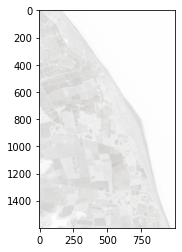

In [10]:
plt.imshow(sample_image)

In [11]:
fb_outputs = facebook_model.predict(sample_image)

In [12]:
nv_outputs = nvidia_model.predict(sample_image)

In [ ]:
ms_outputs = microsoft_model.predict(sample_image)

In [ ]:
fb_outputs.keys()

In [ ]:
nv_outputs.keys()

In [ ]:
ms_outputs.keys()